# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, ShuffleSplit, learning_curve, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import googletrans    
from googletrans import Translator
from sklearn.preprocessing import OrdinalEncoder

# Data Preparation

In [2]:
#Install xlrd since data is in xls format
!pip install xlrd

#Load data into dataframe
df = pd.read_excel('Guangzhou_Air_Quality.xls')
print("There are",len(df) ,"rows and",len(df.columns) ,"columns in this dataset")
display(df)

There are 10000 rows and 8 columns in this dataset


,AQI,createTime,id,updateTime,监测点位名称,空气质量类别,首要污染物,监测日期
0,179,2022-07-27 00:00:56,0431AF7E-A4B8-FD39-5CE2-A61BC7F5158E,2022-07-27 01:12:17,天河五山,中度污染,臭氧8小时(O3_8h),2022-07-25 00:00:00
1,169,2022-07-27 00:00:56,0E37C3BA-93A8-4157-A1ED-503DC5A254A4,2022-07-27 01:12:17,白云新市,中度污染,臭氧8小时(O3_8h),2022-07-25 00:00:00
2,157,2022-07-27 00:00:56,116BD578-1E39-D1CC-F63A-8CF2E22CAD58,2022-07-27 01:12:17,永和子站,中度污染,臭氧8小时(O3_8h),2022-07-25 00:00:00
3,156,2022-07-27 00:00:56,16725BF0-8DEC-938D-902E-D53736331468,2022-07-27 01:12:17,荔福路沙园,中度污染,臭氧8小时(O3_8h),2022-07-25 00:00:00
4,-99,2022-07-27 00:00:56,28BEEA86-8DEC-938D-8C2B-6C4320F1342C,2022-07-27 01:12:17,龙洞小学,—,—,2022-07-25 00:00:00
...,...,...,...,...,...,...,...,...
9995,75,2022-04-05 00:00:41,36ABB7D8-B360-9E31-8B2B-77C9C93B5246,2022-04-05 01:11:34,南沙科学馆,良,臭氧8小时(O3_8h),2022-04-03 00:00:00
9996,64,2022-04-05 00:00:41,39ADE0E8-92A5-F313-003B-218833F739E4,2022-04-05 01:11:34,白云石井,良,二氧化氮(NO2),2022-04-03 00:00:00
9997,45,2022-04-04 00:01:13,3624C4B0-92A5-F313-5B31-8A399C3DB133,2022-04-04 01:11:21,市监测站,优,—,2022-04-02 00:00:00
9998,47,2022-04-04 00:01:13,1F70AC22-6AA4-D987-6FB4-516B303E8730,2022-04-04 01:11:21,黄沙路边站,优,—,2022-04-02 00:00:00


In [3]:
#Drop columns that are irrelevant to the analysis
df = df.drop(columns=['createTime', 'updateTime','id'])
df

,AQI,监测点位名称,空气质量类别,首要污染物,监测日期
0,179,天河五山,中度污染,臭氧8小时(O3_8h),2022-07-25 00:00:00
1,169,白云新市,中度污染,臭氧8小时(O3_8h),2022-07-25 00:00:00
2,157,永和子站,中度污染,臭氧8小时(O3_8h),2022-07-25 00:00:00
3,156,荔福路沙园,中度污染,臭氧8小时(O3_8h),2022-07-25 00:00:00
4,-99,龙洞小学,—,—,2022-07-25 00:00:00
...,...,...,...,...,...
9995,75,南沙科学馆,良,臭氧8小时(O3_8h),2022-04-03 00:00:00
9996,64,白云石井,良,二氧化氮(NO2),2022-04-03 00:00:00
9997,45,市监测站,优,—,2022-04-02 00:00:00
9998,47,黄沙路边站,优,—,2022-04-02 00:00:00


In [4]:
df.dtypes

AQI        int64
监测点位名称    object
空气质量类别    object
首要污染物     object
监测日期      object
dtype: object

In [5]:
df[df.duplicated(keep=False)]

,AQI,监测点位名称,空气质量类别,首要污染物,监测日期
1325,30,大石中学,优,—,2022-06-30 00:00:00
1326,33,龙洞小学,优,—,2022-06-30 00:00:00
1327,22,花都梯面,优,—,2022-06-30 00:00:00
1328,29,花都师范,优,—,2022-06-30 00:00:00
1329,28,南沙街,优,—,2022-06-30 00:00:00
...,...,...,...,...,...
9250,20,天河凤凰山,优,—,2022-04-17 00:00:00
9251,49,石楼镇政府,优,—,2022-04-17 00:00:00
9252,37,番禺大学城,优,—,2022-04-17 00:00:00
9253,25,增城石滩,优,—,2022-04-17 00:00:00


In [6]:
df = df.drop_duplicates()
df

,AQI,监测点位名称,空气质量类别,首要污染物,监测日期
0,179,天河五山,中度污染,臭氧8小时(O3_8h),2022-07-25 00:00:00
1,169,白云新市,中度污染,臭氧8小时(O3_8h),2022-07-25 00:00:00
2,157,永和子站,中度污染,臭氧8小时(O3_8h),2022-07-25 00:00:00
3,156,荔福路沙园,中度污染,臭氧8小时(O3_8h),2022-07-25 00:00:00
4,-99,龙洞小学,—,—,2022-07-25 00:00:00
...,...,...,...,...,...
9995,75,南沙科学馆,良,臭氧8小时(O3_8h),2022-04-03 00:00:00
9996,64,白云石井,良,二氧化氮(NO2),2022-04-03 00:00:00
9997,45,市监测站,优,—,2022-04-02 00:00:00
9998,47,黄沙路边站,优,—,2022-04-02 00:00:00


## Translating the Dataset

In [7]:
#Dataset is in Chinese, so translate into English. Start by translating the column names
translator = Translator()
df_en = df.copy()
df_en.rename(columns=lambda x: translator.translate(x).text, inplace=True)
df_en.columns

Index(['AQI', 'Monitoring point name', 'air quality category',
       'primary pollutant', 'monitoring date'],
      dtype='object')

In [8]:
#Translate the row values. Due to a large number of values, the process will take longer
translations = {}
for column in df_en.columns:
    zh_elements = df_en[column].unique()
    for element in zh_elements:
        translations[element] = translator.translate(element).text

print(translations)

{179: '179', 169: '169', 157: '157', 156: '156', -99: '-99', 181: '181', 191: '191', 101: '101', 122: '122', 184: '184', 139: '139', 87: '87', 115: '115', 147: '147', 182: '182', 164: '164', 161: '161', 125: '125', 134: '134', 158: '158', 151: '151', 143: '143', 155: '155', 177: '177', 167: '167', 162: '162', 140: '140', 152: '152', 160: '160', 171: '171', 170: '170', 62: '62', 113: '113', 95: '95', 103: '103', 201: '201', 204: '204', 168: '168', 188: '188', 186: '186', 163: '163', 150: '150', 175: '175', 128: '128', 90: '90', 50: '50', 132: '132', 123: '123', 117: '117', 146: '146', 84: '84', 173: '173', 153: '153', 135: '135', 106: '106', 133: '133', 174: '174', 99: '99', 111: '111', 138: '138', 180: '180', 91: '91', 54: '54', 176: '176', 121: '121', 116: '116', 124: '124', 79: '79', 80: '80', 149: '149', 126: '126', 110: '110', 75: '75', 47: '47', 112: '112', 66: '66', 145: '145', 105: '105', 129: '129', 100: '100', 69: '69', 127: '127', 130: '130', 148: '148', 93: '93', 82: '82', 1

In [9]:
#Some translations are inaccurate, so they have to be corrected
translations['天河五山'] = 'Tianhe Wushan'
translations['白云新市'] = 'Baiyun Xinshi'
translations['永和子站'] = 'Yonghe Station'
translations['荔福路沙园'] = 'Lifu Road Shayuan'
translations['大石中学'] = 'Dashi Middle School'
translations['白云石井'] = 'Baiyun Shijing'
translations['市五中'] = 'No. 5 Middle School'
translations['沙螺湾'] = 'Shaluowan'
translations['花都梯面'] = 'Huadu Timian'
translations['黄阁子站'] = 'Huangge Station'
translations['荔湾芳村'] = 'Liwan Fangcun'
translations['番禺南村'] = 'Panyu Nancun'
translations['白云竹料'] = 'Baiyun Zhuliao'
translations['南沙榄核'] = 'Nansha Lanhe'
translations['大夫山'] = 'Dafu Mountain'
translations['十八涌'] = 'Shibachong'
translations['增城石滩'] = 'Zengcheng Shitan'
translations['市八十六中'] = 'No. 86 Middle School'
translations['黄埔文冲'] = 'Huangpu Wenchong'
translations['九龙镇镇龙'] = 'Jiulong Town Zhenlong'
translations['西区子站'] = 'Xiqu Station'
translations['中度污染'] = 'moderate pollution'


#Recheck the translations
print(translations)

{179: '179', 169: '169', 157: '157', 156: '156', -99: '-99', 181: '181', 191: '191', 101: '101', 122: '122', 184: '184', 139: '139', 87: '87', 115: '115', 147: '147', 182: '182', 164: '164', 161: '161', 125: '125', 134: '134', 158: '158', 151: '151', 143: '143', 155: '155', 177: '177', 167: '167', 162: '162', 140: '140', 152: '152', 160: '160', 171: '171', 170: '170', 62: '62', 113: '113', 95: '95', 103: '103', 201: '201', 204: '204', 168: '168', 188: '188', 186: '186', 163: '163', 150: '150', 175: '175', 128: '128', 90: '90', 50: '50', 132: '132', 123: '123', 117: '117', 146: '146', 84: '84', 173: '173', 153: '153', 135: '135', 106: '106', 133: '133', 174: '174', 99: '99', 111: '111', 138: '138', 180: '180', 91: '91', 54: '54', 176: '176', 121: '121', 116: '116', 124: '124', 79: '79', 80: '80', 149: '149', 126: '126', 110: '110', 75: '75', 47: '47', 112: '112', 66: '66', 145: '145', 105: '105', 129: '129', 100: '100', 69: '69', 127: '127', 130: '130', 148: '148', 93: '93', 82: '82', 1

In [10]:
df_en.replace(translations, inplace = True)
df_en

,AQI,Monitoring point name,air quality category,primary pollutant,monitoring date
0,179,Tianhe Wushan,moderate pollution,Ozone 8 hours (O3_8h),2022-07-25 00:00:00
1,169,Baiyun Xinshi,moderate pollution,Ozone 8 hours (O3_8h),2022-07-25 00:00:00
2,157,Yonghe Station,moderate pollution,Ozone 8 hours (O3_8h),2022-07-25 00:00:00
3,156,Lifu Road Shayuan,moderate pollution,Ozone 8 hours (O3_8h),2022-07-25 00:00:00
4,-99,Longdong Primary School,—,—,2022-07-25 00:00:00
...,...,...,...,...,...
9995,75,Nansha Science Museum,good,Ozone 8 hours (O3_8h),2022-04-03 00:00:00
9996,64,Baiyun Shijing,good,Nitrogen dioxide (NO2),2022-04-03 00:00:00
9997,45,City Monitoring Station,excellent,—,2022-04-02 00:00:00
9998,47,Huangsha Roadside Station,excellent,—,2022-04-02 00:00:00


# Final checks to the dataset

In [11]:
#Rename the column to maintain presentation
df_en = df_en.rename(columns={'Monitoring point name': 'monitoring point name'})

In [12]:
#Modify two columns to the correct type
df_en['monitoring date'] = pd.to_datetime(df_en['monitoring date'], format='%Y-%m-%d')
df_en['AQI'] = pd.to_numeric(df_en['AQI'])
df_en.dtypes

AQI                               int64
monitoring point name            object
air quality category             object
primary pollutant                object
monitoring date          datetime64[ns]
dtype: object

In [13]:
#Replace the dashes with NaN values
df_en = df_en.replace('—', np.nan)
df_en = df_en.replace('-', np.nan)

In [14]:
#List all monitoring points
df_en['monitoring point name'].unique()

array(['Tianhe Wushan', 'Baiyun Xinshi', 'Yonghe Station',
       'Lifu Road Shayuan', 'Longdong Primary School', 'Baiyun Jiahe',
       'Yangji Roadside Station', 'Baiyun Jianggao',
       'Dashi Middle School', 'Tianhe Vocational and Child Care',
       'Nansha Street', 'Nansha Science Museum', 'Baiyun Shijing',
       'Siyuan Middle School', 'No. 5 Middle School', 'Shaluowan',
       'Tianhe Phoenix Mountain', 'Huadu Timian', 'Dafengmen Reservoir',
       'Zengcheng Zhongxin', 'Huangge Station', 'Liwan Fangcun',
       'Haizhu Lake', 'Conghua Middle School', 'City Monitoring Station',
       'Maofeng Mountain', 'Guangzhou City', 'Panyu Nancun',
       'Guangdong Business School', 'Science City', 'Panyu Middle School',
       'Baiyun Zhuliao', 'Luhu', 'Nansha Lanhe', 'Shilou Town Government',
       'Huangsha Roadside Station', 'Guangya Middle School',
       'Dafu Mountain', 'Shibachong', 'Zengcheng Shitan',
       'Panyu University City', 'Conghua Liangkou',
       'Xintang Town Go

In [15]:
#Count how many monitoring points are in the dataset
mpn =  len(df_en['monitoring point name'].unique())
print("There are",mpn,"monitoring points in Guangzhou")

There are 53 monitoring points in Guangzhou


Some of the places have the district name in them. Others don't. In order to find the district of the other monitoring points, a web search will have to be conducted.

- Yonghe Station - Huangpu
- Lifu Road Shayuan - Haizhu
- Longdong Primary School - Tianhe
- Yangji Roadside Station - Yuexiu
- Dashi Middle School - Panyu
- Siyuan Middle School - Tianhe
- No. 5 Middle School - Haizhu
- Shaluowan - Nansha
- Dafengmen Reservoir - Zengcheng
- Huangge Station - Nansha
- Maofeng Mountain - Baiyun
- Guangdong Business School - Haizhu
- Science City - Huangpu
- Luhu - Yuexiu
- Shilou Town Government - Panyu
- Huangsha Roadside Station - Liwan
- Guangya Middle School - Liwan
- Dafu Mountain - Panyu
- Shibachong - Nansha
- Xintang Town Government - Zengcheng
- No. 86 Middle School - Huangpu
- Jiulong Town Zhenlong - Huangpu
- Xiqu Station - Huangpu
- City Monitoring Station - Yuexiu

## Sorting by District

In [16]:
#Liwan
df_en.loc[df_en['monitoring point name'].str.contains("Liwan|Huangsha|Guangya"), 'District'] = 'Liwan'

#Tianhe
df_en.loc[df_en['monitoring point name'].str.contains("Tianhe|Longdong|Siyuan"), 'District'] = 'Tianhe'

#Yuexiu
df_en.loc[df_en['monitoring point name'].str.contains("Yangji|Luhu|City Monitoring Station"), 'District'] = 'Yuexiu'

#Haizhu
df_en.loc[df_en['monitoring point name'].str.contains("Haizhu|Lifu|No. 5|Guangdong Business School"), 'District'] = 'Haizhu'

#Baiyun
df_en.loc[df_en['monitoring point name'].str.contains("Baiyun|Maofeng"), 'District'] = 'Baiyun'

#Huangpu
df_en.loc[df_en['monitoring point name'].str.contains("Huangpu|Yonghe|Science City|No. 86|Jiulong|Xiqu"), 'District'] = 'Huangpu'

#Panyu
df_en.loc[df_en['monitoring point name'].str.contains("Panyu|Dashi|Shilou|Dafu"), 'District'] = 'Panyu'

#Huadu
df_en.loc[df_en['monitoring point name'].str.contains("Huadu"), 'District'] = 'Huadu'

#Nansha
df_en.loc[df_en['monitoring point name'].str.contains("Nansha|Shaluowan|Huangge|Shibachong"), 'District'] = 'Nansha'

#Conghua
df_en.loc[df_en['monitoring point name'].str.contains("Conghua"), 'District'] = 'Conghua'

#Zengcheng
df_en.loc[df_en['monitoring point name'].str.contains("Zengcheng|Dafengmen|Xintang"), 'District'] = 'Zengcheng'

#City
df_en.loc[df_en['monitoring point name'].str.contains("Guangzhou City"), 'District'] = 'City'

In [17]:
#Show update dataframe with Districts added
df_en

,AQI,monitoring point name,air quality category,primary pollutant,monitoring date,District
0,179,Tianhe Wushan,moderate pollution,Ozone 8 hours (O3_8h),2022-07-25,Tianhe
1,169,Baiyun Xinshi,moderate pollution,Ozone 8 hours (O3_8h),2022-07-25,Baiyun
2,157,Yonghe Station,moderate pollution,Ozone 8 hours (O3_8h),2022-07-25,Huangpu
3,156,Lifu Road Shayuan,moderate pollution,Ozone 8 hours (O3_8h),2022-07-25,Haizhu
4,-99,Longdong Primary School,NaN,NaN,2022-07-25,Tianhe
...,...,...,...,...,...,...
9995,75,Nansha Science Museum,good,Ozone 8 hours (O3_8h),2022-04-03,Nansha
9996,64,Baiyun Shijing,good,Nitrogen dioxide (NO2),2022-04-03,Baiyun
9997,45,City Monitoring Station,excellent,NaN,2022-04-02,Yuexiu
9998,47,Huangsha Roadside Station,excellent,NaN,2022-04-02,Liwan


## Separating city records from dataframe

In [18]:
#Create separate dataframe for city records
df_en_city = df_en[df_en['monitoring point name'].str.contains("Guangzhou City")]
df_en_city

,AQI,monitoring point name,air quality category,primary pollutant,monitoring date,District
26,162,Guangzhou City,moderate pollution,Ozone 8 hours (O3_8h),2022-07-25,City
105,134,Guangzhou City,light pollution,Ozone 8 hours (O3_8h),2022-07-24,City
109,113,Guangzhou City,light pollution,Ozone 8 hours (O3_8h),2022-07-23,City
188,113,Guangzhou City,light pollution,Ozone 8 hours (O3_8h),2022-07-22,City
223,53,Guangzhou City,good,Ozone 8 hours (O3_8h),2022-07-21,City
...,...,...,...,...,...,...
9742,95,Guangzhou City,good,Ozone 8 hours (O3_8h),2022-04-07,City
9833,130,Guangzhou City,light pollution,Ozone 8 hours (O3_8h),2022-04-06,City
9854,133,Guangzhou City,light pollution,Ozone 8 hours (O3_8h),2022-04-05,City
9901,95,Guangzhou City,good,Ozone 8 hours (O3_8h),2022-04-04,City


In [19]:
#Separate the city from the translated dataframe
df_en.drop(df_en[df_en['District'] == 'City'].index, inplace = True)

## Checking for NaN values and outliers

In [20]:
#Count the number of NaN values
df_en.isna().sum()

AQI                         0
monitoring point name       0
air quality category      235
primary pollutant        3683
monitoring date             0
District                    0
dtype: int64

<AxesSubplot:xlabel='AQI', ylabel='Count'>

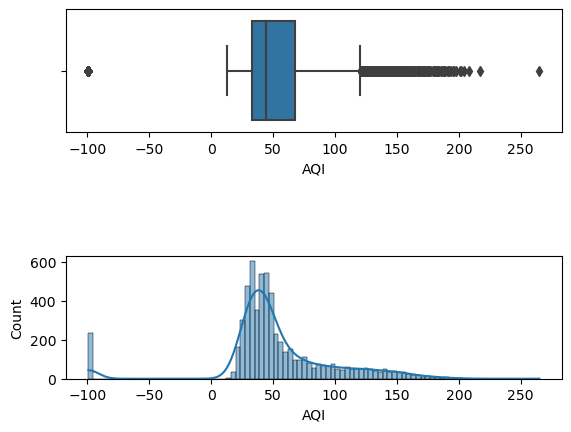

In [21]:
fig, axes = plt.subplots(2,1)
fig.subplots_adjust(hspace=1)
sns.boxplot(x = df_en['AQI'], ax = axes[0])
sns.histplot(x = df_en['AQI'], kde = True, ax = axes[1])

In [22]:
#Display rows where AQI is -99
df_en[df_en['AQI'] == -99]

,AQI,monitoring point name,air quality category,primary pollutant,monitoring date,District
4,-99,Longdong Primary School,NaN,NaN,2022-07-25,Tianhe
29,-99,Science City,NaN,NaN,2022-07-25,Huangpu
64,-99,Baiyun Jianggao,NaN,NaN,2022-07-24,Baiyun
92,-99,Science City,NaN,NaN,2022-07-24,Huangpu
133,-99,Science City,NaN,NaN,2022-07-23,Huangpu
...,...,...,...,...,...,...
9703,-99,Dafengmen Reservoir,NaN,NaN,2022-04-08,Zengcheng
9777,-99,Huangsha Roadside Station,NaN,NaN,2022-04-07,Liwan
9915,-99,Zengcheng Zhongxin,NaN,NaN,2022-04-04,Zengcheng
9951,-99,Liwan Fangcun,NaN,NaN,2022-04-03,Liwan


There are 235 rows where the AQI is -99.

In [23]:
#Drop the rows where AQI is -99
df_en.drop(df_en[df_en['AQI'] == -99].index, inplace = True)

<AxesSubplot:xlabel='AQI', ylabel='Count'>

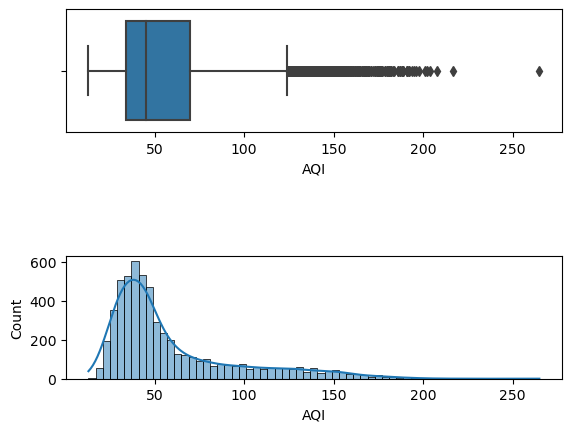

In [24]:
fig, axes = plt.subplots(2,1)
fig.subplots_adjust(hspace=1)
sns.boxplot(x = df_en['AQI'], ax = axes[0])
sns.histplot(x = df_en['AQI'], kde = True, ax = axes[1])

In [25]:
#Top 10 areas with high AQI values
df_en.sort_values(by = 'AQI', ascending=False).head(10)

,AQI,monitoring point name,air quality category,primary pollutant,monitoring date,District
4033,265,Nansha Lanhe,heavy pollution,Ozone 8 hours (O3_8h),2022-06-05,Nansha
3780,217,Baiyun Mountain,heavy pollution,Ozone 8 hours (O3_8h),2022-06-07,Baiyun
4519,208,Guangdong Business School,heavy pollution,Ozone 8 hours (O3_8h),2022-05-31,Haizhu
44,204,Huadu Huadong,heavy pollution,Ozone 8 hours (O3_8h),2022-07-25,Huadu
7248,202,Huadu Huadong,heavy pollution,Ozone 8 hours (O3_8h),2022-05-05,Huadu
42,201,Xintang Town Government,heavy pollution,Ozone 8 hours (O3_8h),2022-07-25,Zengcheng
5829,198,Shaluowan,moderate pollution,Ozone 8 hours (O3_8h),2022-05-19,Nansha
5900,196,Nansha Lanhe,moderate pollution,Ozone 8 hours (O3_8h),2022-05-18,Nansha
5775,195,Huadu Normal University,moderate pollution,Ozone 8 hours (O3_8h),2022-05-19,Huadu
8735,194,Baiyun Zhuliao,moderate pollution,Ozone 8 hours (O3_8h),2022-04-21,Baiyun


In [26]:
#Top 10 areas with low AQI values
df_en.sort_values(by = 'AQI', ascending=False).tail(10)

,AQI,monitoring point name,air quality category,primary pollutant,monitoring date,District
6548,18,Zengcheng Environmental Protection Bureau,excellent,NaN,2022-05-12,Zengcheng
1332,18,Huangpu Wenchong,excellent,NaN,2022-06-30,Huangpu
310,17,Baiyun Mountain,excellent,NaN,2022-07-20,Baiyun
917,17,Conghua Liangkou,excellent,NaN,2022-07-08,Conghua
2605,17,Shibachong,excellent,NaN,2022-06-18,Nansha
9183,16,Conghua Liangkou,excellent,NaN,2022-04-17,Conghua
1414,16,Maofeng Mountain,excellent,NaN,2022-06-30,Baiyun
9077,15,Zengcheng Environmental Protection Bureau,excellent,NaN,2022-04-18,Zengcheng
1244,15,Baiyun Mountain,excellent,NaN,2022-07-02,Baiyun
1201,13,Baiyun Mountain,excellent,NaN,2022-07-03,Baiyun


# Visualizing Data

In [27]:
#Print average of the city during the time period
city_avg = df_en_city['AQI'].mean()
print("City:",city_avg)

City: 58.30701754385965


In [28]:
districts = df_en.groupby(['District'])['AQI'].mean().sort_values(ascending=False)
print(districts)

District
Yuexiu       63.997015
Huadu        63.801802
Haizhu       62.335601
Huangpu      61.127080
Tianhe       60.495430
Liwan        59.861963
Baiyun       57.534194
Panyu        56.794503
Nansha       56.585557
Zengcheng    54.444860
Conghua      49.434389
Name: AQI, dtype: float64


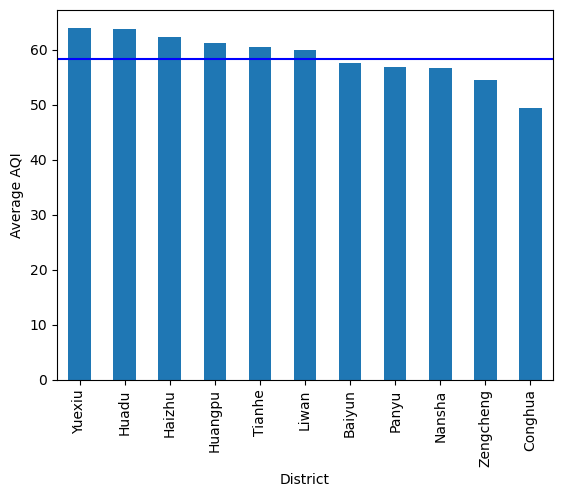

In [29]:
districts.plot(kind = 'bar', xlabel = 'District', ylabel = 'Average AQI')
plt.axhline(city_avg, color = 'b')

Yuexiu, Huadu, Haizhu, Huangpu, Tianhe, and Liwan had average AQIs higher than the city average.

In [30]:
monitoring_pts = df_en.groupby(['monitoring point name'])['AQI'].mean().sort_values(ascending=False) 

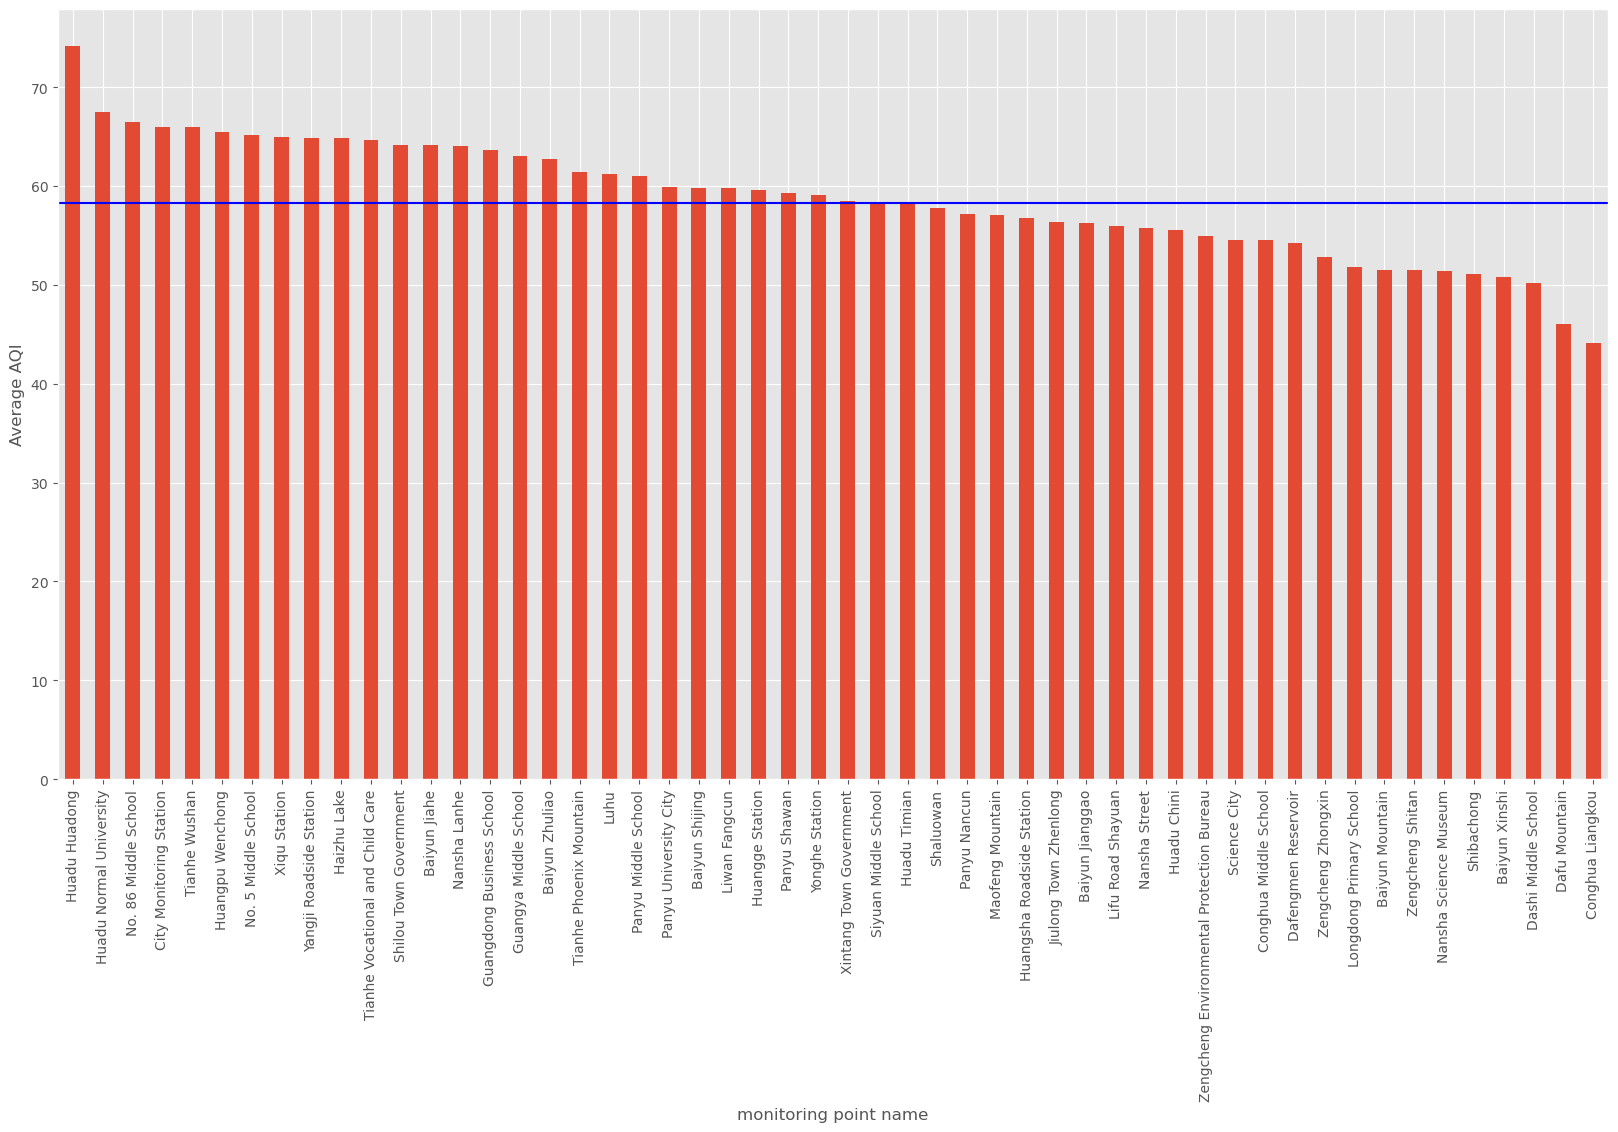

In [31]:
plt.figure(figsize=(20, 10))
plt.style.use(['ggplot'])
monitoring_pts.plot(kind = 'bar', xlabel = 'monitoring point name', ylabel = 'Average AQI')
plt.axhline(city_avg, color = 'b')

28 of the monitoring points have averages higher than the city's average.

Ozone 8 hours (O3_8h)                                         1859
Nitrogen dioxide (NO2)                                         254
Particulate Matter (PM10)                                       77
Fine particulate matter (PM2.5)                                 34
Nitrogen dioxide (NO2), ozone 8 hours (O3_8h)                    5
Fine particulate matter (PM2.5), particulate matter (PM10)       3
Nitrogen dioxide (NO2), particulate matter (PM10)                3
Ozone 8 hours (O3_8h), particulate matter (PM10)                 2
Fine particulate matter (PM2.5), ozone for 8 hours (O3_8h)       1
Name: primary pollutant, dtype: int64


<AxesSubplot:>

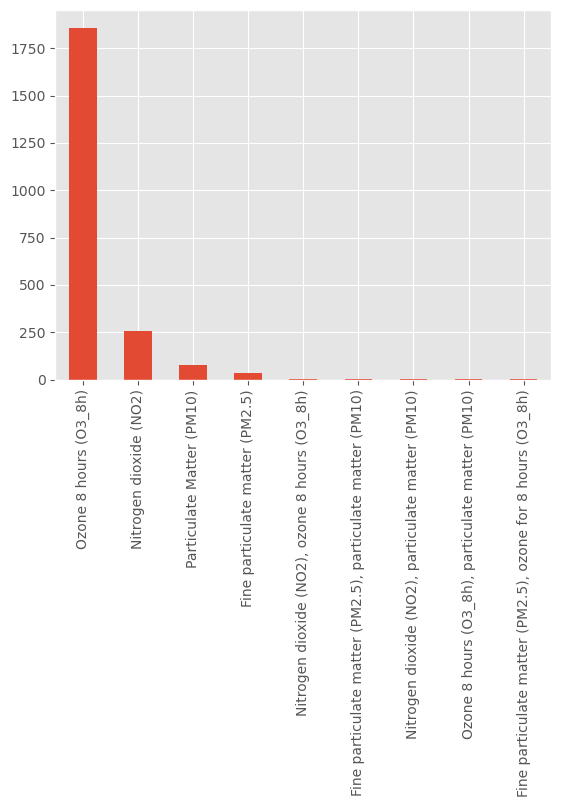

In [32]:
print(df_en['primary pollutant'].value_counts())
df_en['primary pollutant'].value_counts().plot(kind='bar')

Pollutants in this analysis include Ozone 8h, Nitrogen Dioxide, Particulate Matter (PM10), and Fine Particulate Matter (PM2.5). Only 14 measurements have a mixture of two pollutants.

<AxesSubplot:>

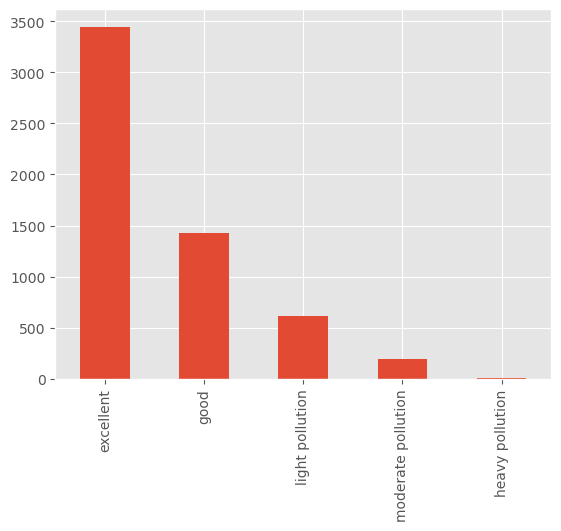

In [33]:
df_en['air quality category'].value_counts().plot(kind='bar')

Majority of the measuring points reported excellent air quality.

<AxesSubplot:xlabel='District', ylabel='count'>

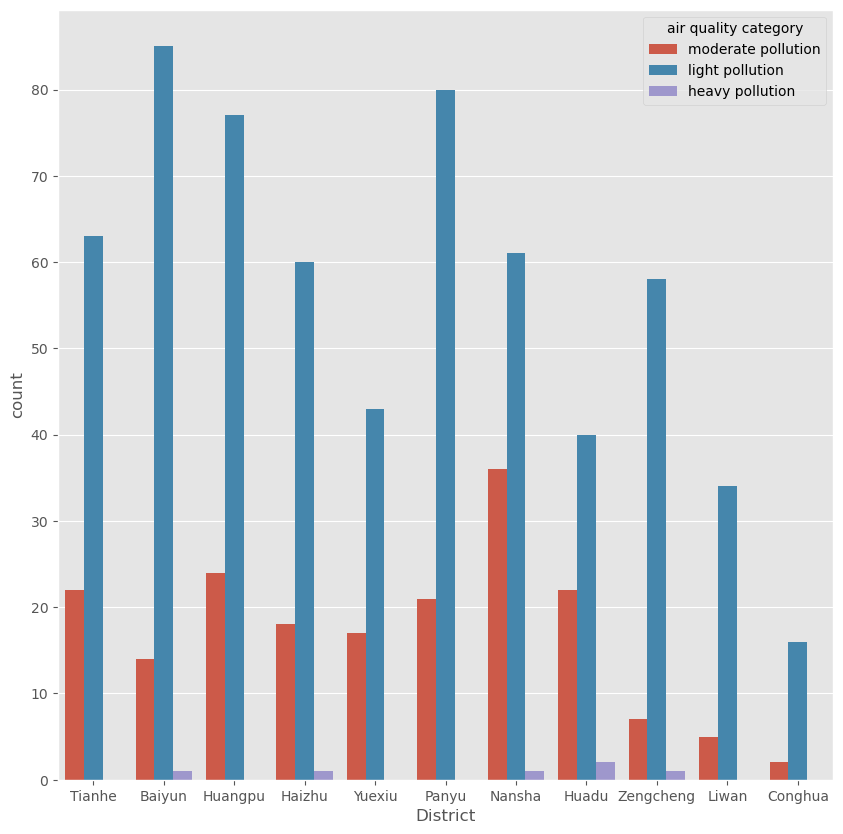

In [34]:
pollution = df_en.loc[(df_en['air quality category'] == 'light pollution') | (df_en['air quality category'] == 'moderate pollution') | (df_en['air quality category'] == 'heavy pollution')]
plt.figure(figsize=(10, 10))
sns.countplot(x = 'District', hue = 'air quality category', data = pollution)

All districts reported mostly light pollution. Only Baiyun, Haizhu, Nansha, Huadu, and Zengcheng districts reported heavy pollution.

<AxesSubplot:xlabel='District', ylabel='count'>

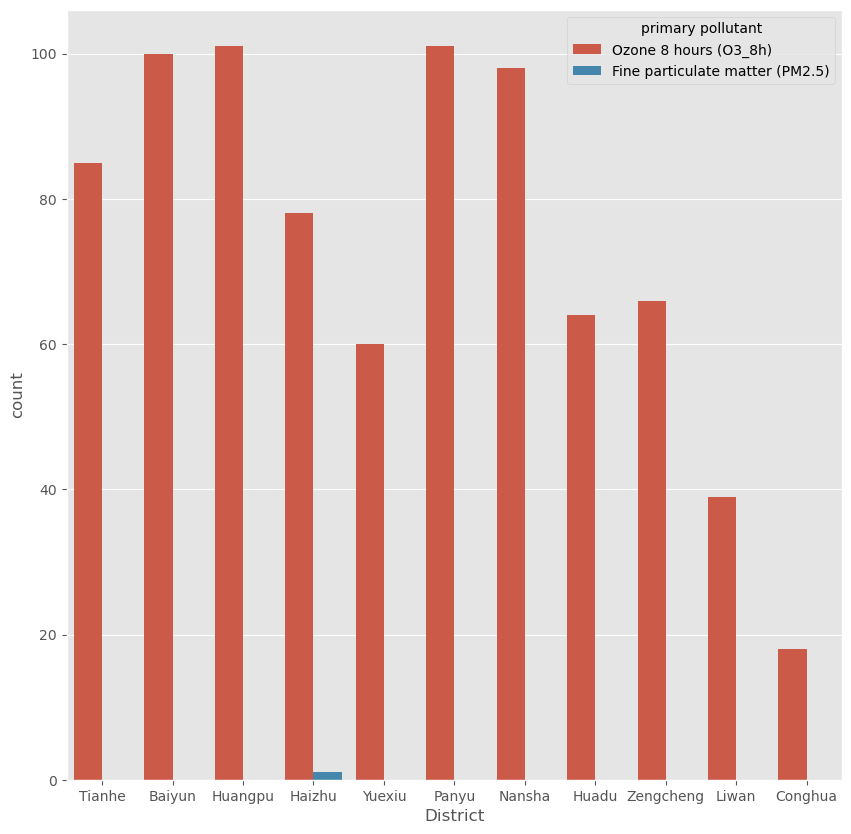

In [35]:
plt.figure(figsize=(10, 10))
sns.countplot(x = 'District', hue = 'primary pollutant', data = pollution)

All districts have Ozone 8h as the primary pollutant. Only Haizhu District has measurements where either Ozone 8h or fine particulate matter (PM 2.5) was detected.

In [36]:
df_particulate = pollution[pollution['primary pollutant'].str.contains('Fine')]
df_particulate

,AQI,monitoring point name,air quality category,primary pollutant,monitoring date,District
4510,140,Haizhu Lake,light pollution,Fine particulate matter (PM2.5),2022-05-31,Haizhu


Haizhu Lake is the only monitoring point with light pollution to have fine particulate matter (PM2.5) in the air. 

In [37]:
mixed_poll = df_en.dropna(subset='primary pollutant')
mixed_poll = mixed_poll[mixed_poll['primary pollutant'].str.contains(',')]
mixed_poll

,AQI,monitoring point name,air quality category,primary pollutant,monitoring date,District
5243,60,Xiqu Station,good,"Nitrogen dioxide (NO2), ozone 8 hours (O3_8h)",2022-05-24,Huangpu
5497,58,Panyu Shawan,good,"Fine particulate matter (PM2.5), ozone for 8 h...",2022-05-22,Panyu
5561,55,Shilou Town Government,good,"Nitrogen dioxide (NO2), ozone 8 hours (O3_8h)",2022-05-21,Panyu
5609,57,Science City,good,"Fine particulate matter (PM2.5), particulate m...",2022-05-21,Huangpu
6030,55,Yangji Roadside Station,good,"Nitrogen dioxide (NO2), ozone 8 hours (O3_8h)",2022-05-17,Yuexiu
7059,55,Baiyun Zhuliao,good,"Fine particulate matter (PM2.5), particulate m...",2022-05-07,Baiyun
7297,65,Huangsha Roadside Station,good,"Nitrogen dioxide (NO2), particulate matter (PM10)",2022-05-05,Liwan
7509,55,Yangji Roadside Station,good,"Ozone 8 hours (O3_8h), particulate matter (PM10)",2022-05-03,Yuexiu
7786,55,Baiyun Jiahe,good,"Ozone 8 hours (O3_8h), particulate matter (PM10)",2022-04-30,Baiyun
7821,58,No. 86 Middle School,good,"Nitrogen dioxide (NO2), particulate matter (PM10)",2022-04-30,Huangpu


In [38]:
mixed_poll['District'].value_counts()

Huangpu      3
Panyu        2
Yuexiu       2
Baiyun       2
Liwan        2
Huadu        1
Zengcheng    1
Haizhu       1
Name: District, dtype: int64

In [39]:
mixed_poll['monitoring point name'].value_counts()

Yangji Roadside Station      2
Huangsha Roadside Station    2
Xiqu Station                 1
Panyu Shawan                 1
Shilou Town Government       1
Science City                 1
Baiyun Zhuliao               1
Baiyun Jiahe                 1
No. 86 Middle School         1
Huadu Chini                  1
Xintang Town Government      1
Haizhu Lake                  1
Name: monitoring point name, dtype: int64

All the measurements where there are two pollutants ranged between 52 and 65. Huangpu had the most reported measurements for mixed pollutants. Yanji Roadside Station in Yuexiu District and Huangsha Roadside Station in Liwan District each had two measurements for mixed pollutants. Moreover, the AQI for Yanji Roadside Station stayed constant while the AQI at Huangsha Roadside station increased by 13.

In [40]:
df_en['District'].value_counts()

Baiyun       775
Panyu        764
Huangpu      661
Nansha       637
Tianhe       547
Zengcheng    535
Huadu        444
Haizhu       441
Yuexiu       335
Liwan        326
Conghua      221
Name: District, dtype: int64

Text(0.5, 1.0, 'Conghua')

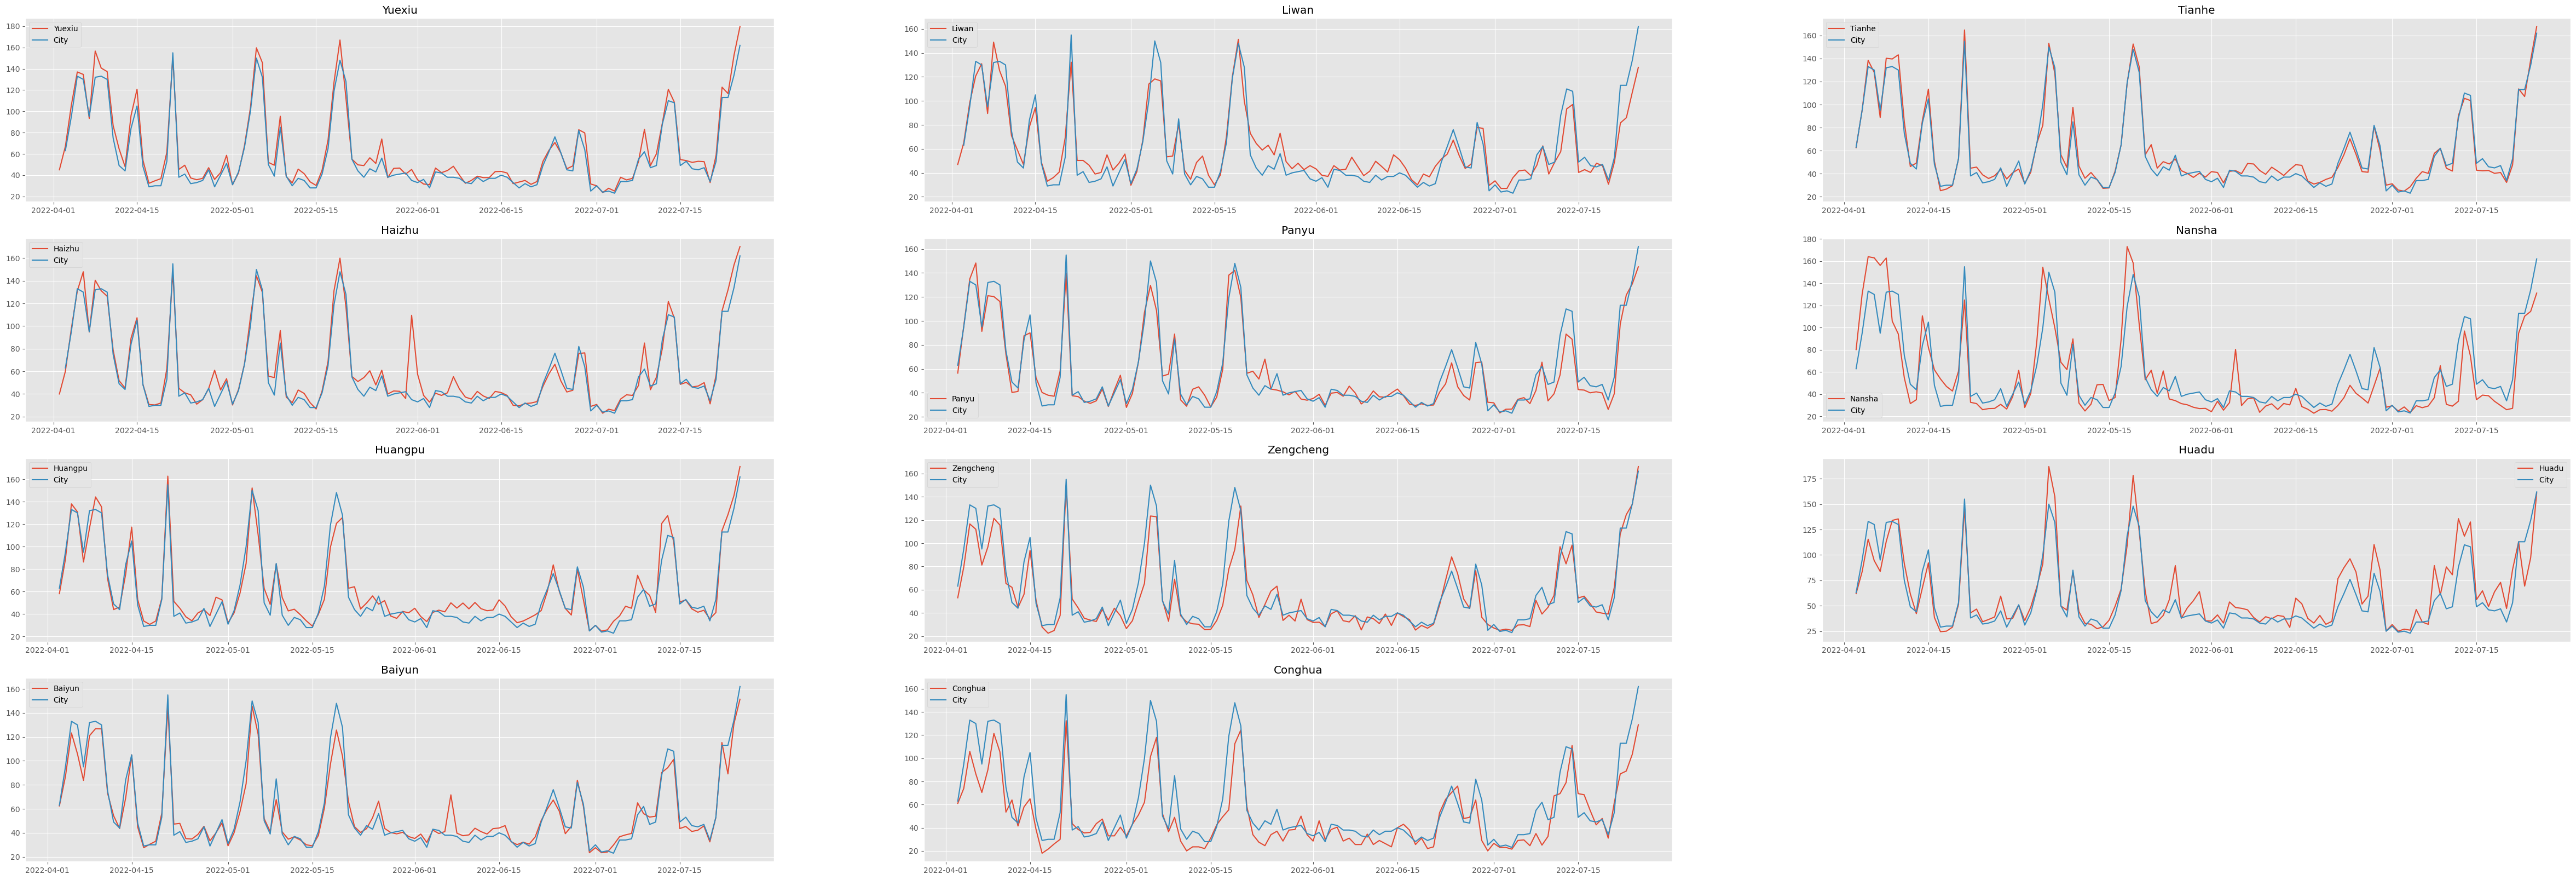

In [41]:
figure, axis = plt.subplots(4, 3)

figure.set_figheight(20)
figure.set_figwidth(60)
figure.delaxes(axis[3,2])

city = df_en_city[df_en_city['District'] == 'City'].groupby(by = 'monitoring date').mean()
yuexiu = df_en[df_en['District'] == 'Yuexiu'].groupby(by = 'monitoring date').mean()
liwan = df_en[df_en['District'] == 'Liwan'].groupby(by = 'monitoring date').mean()
tianhe = df_en[df_en['District'] == 'Tianhe'].groupby(by = 'monitoring date').mean()
huangpu = df_en[df_en['District'] == 'Huangpu'].groupby(by = 'monitoring date').mean()
nansha = df_en[df_en['District'] == 'Nansha'].groupby(by = 'monitoring date').mean()
zengcheng = df_en[df_en['District'] == 'Zengcheng'].groupby(by = 'monitoring date').mean()
huadu = df_en[df_en['District'] == 'Huadu'].groupby(by = 'monitoring date').mean()
haizhu = df_en[df_en['District'] == 'Haizhu'].groupby(by = 'monitoring date').mean()
conghua = df_en[df_en['District'] == 'Conghua'].groupby(by = 'monitoring date').mean()
baiyun = df_en[df_en['District'] == 'Baiyun'].groupby(by = 'monitoring date').mean()
panyu = df_en[df_en['District'] == 'Panyu'].groupby(by = 'monitoring date').mean()



axis[0, 0].plot(yuexiu)
axis[0, 0].plot(city)
axis[0, 0].legend(['Yuexiu', 'City'])
axis[0, 0].set_title("Yuexiu")

axis[0, 1].plot(liwan)
axis[0, 1].plot(city)
axis[0, 1].legend(['Liwan', 'City'])
axis[0, 1].set_title("Liwan")

axis[0, 2].plot(tianhe)
axis[0, 2].plot(city)
axis[0, 2].legend(['Tianhe', 'City'])
axis[0, 2].set_title("Tianhe")

axis[1, 0].plot(haizhu)
axis[1, 0].plot(city)
axis[1, 0].legend(['Haizhu', 'City'])
axis[1, 0].set_title("Haizhu")

axis[1, 1].plot(panyu)
axis[1, 1].plot(city)
axis[1, 1].legend(['Panyu', 'City'])
axis[1, 1].set_title("Panyu")

axis[1, 2].plot(nansha)
axis[1, 2].plot(city)
axis[1, 2].legend(['Nansha', 'City'])
axis[1, 2].set_title("Nansha")

axis[2, 0].plot(huangpu)
axis[2, 0].plot(city)
axis[2, 0].legend(['Huangpu', 'City'])
axis[2, 0].set_title("Huangpu")

axis[2, 1].plot(zengcheng)
axis[2, 1].plot(city)
axis[2, 1].legend(['Zengcheng', 'City'])
axis[2, 1].set_title("Zengcheng")

axis[2, 2].plot(huadu)
axis[2, 2].plot(city)
axis[2, 2].legend(['Huadu', 'City'])
axis[2, 2].set_title("Huadu")

axis[3, 0].plot(baiyun)
axis[3, 0].plot(city)
axis[3, 0].legend(['Baiyun', 'City'])
axis[3, 0].set_title("Baiyun")

axis[3, 1].plot(conghua)
axis[3, 1].plot(city)
axis[3, 1].legend(['Conghua', 'City'])
axis[3, 1].set_title("Conghua")

All 11 districts and their average AQI over time were plotted again the city's average AQI over time. The red line represents each district while the blue line represents the city.

# Correlation Analysis

In [42]:
corr_analy = df_en.copy()
corr_analy = corr_analy.dropna()
corr_analy['Month'] = corr_analy['monitoring date'].dt.month
corr_analy['Day'] = corr_analy['monitoring date'].dt.day
corr_analy = corr_analy.drop(columns = ['AQI','monitoring date'])
enc = OrdinalEncoder()
corr_analy = enc.fit_transform(corr_analy)
corr_analy = pd.DataFrame(corr_analy, columns = ['monitoring point name', 'air quality category', 'primary pollutant', 'District', 'Month', 'Day'])
corr_analy

,monitoring point name,air quality category,primary pollutant,District,Month,Day
0,44.0,3.0,6.0,8.0,3.0,24.0
1,4.0,3.0,6.0,0.0,3.0,24.0
2,48.0,3.0,6.0,4.0,3.0,24.0
3,23.0,3.0,6.0,2.0,3.0,24.0
4,0.0,3.0,6.0,0.0,3.0,24.0
...,...,...,...,...,...,...
2233,20.0,0.0,6.0,4.0,0.0,2.0
2234,25.0,0.0,6.0,8.0,0.0,2.0
2235,33.0,0.0,6.0,7.0,0.0,2.0
2236,29.0,0.0,6.0,6.0,0.0,2.0


The month was extracted from the monitoring date as it will be used to determine whether it's a contributing factor to the air quality category.

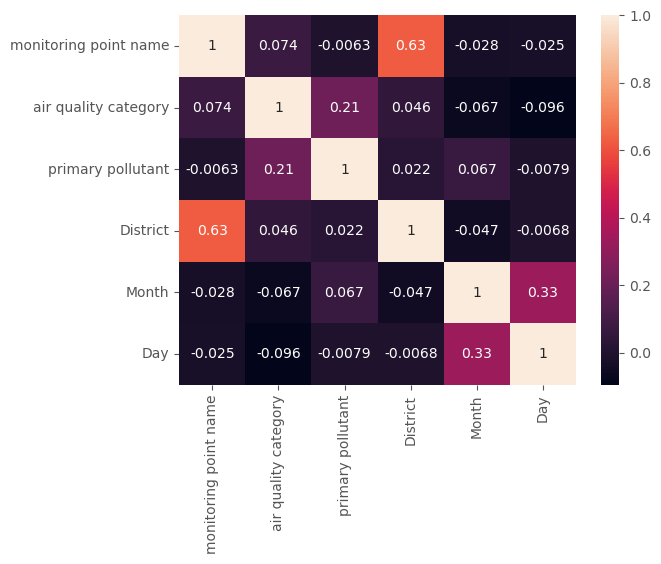

In [43]:
corr_matrix = corr_analy.corr(method ='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.show()

There's little correlation between monitoring point name and air quality category, month and primary pollutant, and district and air quality category. Stronger correlation only existed between monitoring point name and district, day and month, and air quality category and primary pollutant.

# Correlation Modeling

The random forest is a machine learning algorithm that is used for classification and it's construct decision trees. It was chosen for this study due to its simplicity and faster training abilities.

In [44]:
X = corr_analy.drop(['air quality category'], axis=1)
y = corr_analy['air quality category']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [46]:
X_train.shape, X_test.shape

((1499, 5), (739, 5))

In [47]:
rf = RandomForestClassifier(random_state=1)
rf = rf.fit(X_train, y_train)

In [48]:
y_pred = rf.predict(X_test)

In [49]:
feat_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feat_scores

Day                      0.488130
monitoring point name    0.233459
District                 0.105499
Month                    0.089279
primary pollutant        0.083633
dtype: float64

Text(0, 0.5, 'Features')

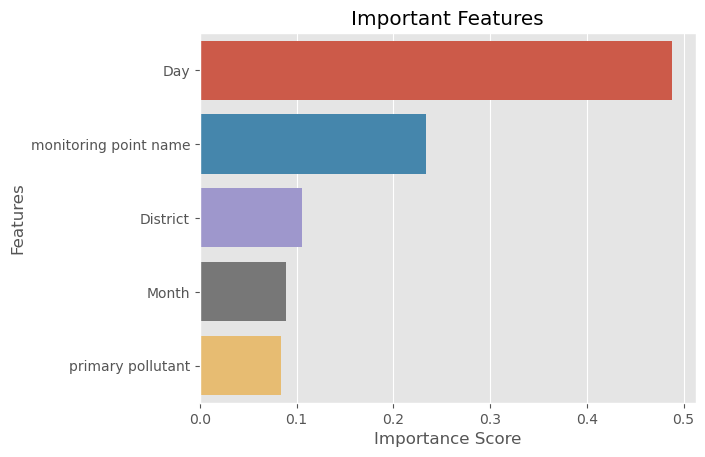

In [50]:
sns.barplot(x=feat_scores, y=feat_scores.index)
plt.title('Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')

Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       473
         1.0       0.00      0.00      0.00         1
         2.0       0.62      0.59      0.61       207
         3.0       0.56      0.34      0.43        58

    accuracy                           0.78       739
   macro avg       0.51      0.46      0.48       739
weighted avg       0.76      0.78      0.77       739

Confusion Matrix


<AxesSubplot:>

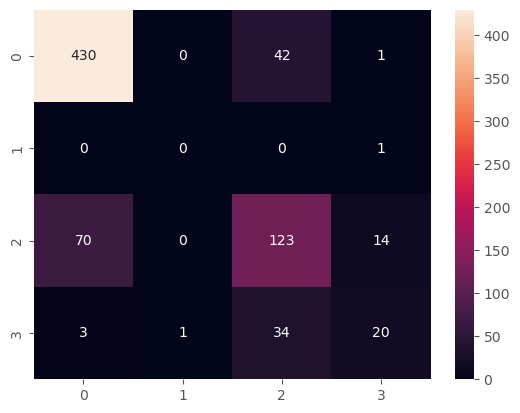

In [51]:
cnf_matrix=confusion_matrix(y_test,y_pred)
print('Classification Report')
print(classification_report(y_test, y_pred, zero_division=1))
print('Confusion Matrix')
sns.heatmap(cnf_matrix, annot=True,fmt=".0f")